<a href="https://colab.research.google.com/github/DanieloSendi/MachineLearning/blob/main/Lab3_ConvNet_1_Introduction%2C_Working_with_own_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ConvNet 1 - Introduction, Working with own dataset**

## Part 1 Let's start with Convnet - Mnist dataset

We will use Convnet layers to classify MNIST digits, a task that you have analysed using a densely-connected network (test accuracy was 97.8%).

### Dataset

Please reuse the code from the second exercise, which has already covered the MNIST database.
Change the shape of the training testing images to tensor (60000, 28, 28, 1) and (10000, 28, 28, 1)).

In [ ]:
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.float32(np.reshape(train_images, (60000, 28, 28, 1)))/255
test_images = np.float32(np.reshape(test_images, (10000, 28, 28, 1)))/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape)
print(train_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000, 10)


### Convnet architecture
A basic convnet architecture is a a stack of Conv2D and MaxPooling2D layers followed by the classification part.
A convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images.

- Pass the argument `input_shape=(28, 28, 1)` to our first layer
- Number of channels is controlled by the first argument passed to each Conv2D layer (here 32 or 64).
- The filters should have size 3×3.

Implementation a ConvNet architecture consisting of 3 Conv2d layers with nb. of channels: 32→64→64. Between the Conv2d should be a MaxPolling2D layer with filter:size 2×2.
Display the architecture:

Layers:


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=train_images[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=train_images[0].shape))

model.summary()

# model.add(layers.Conv2D(nb of filters, (filter size, filter size), activation='relu', input_shape=(image_height, image_width, image_channels)))
# model.add(layers.MaxPooling2D((filter size, filter size)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

The next step would be to feed our last output tensor (of shape (3, 3, 64)) into a densely-connected `classifier network`: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top.

Only the <ins>last layer</ins> changes the activation function to `softmax`.

Model Summary:

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# model.add(layers.Flatten())
# model.add(layers.Dense(nb. of channels -output of last Conv2d, activation='Function'))
# model.add(layers.Dense(nb. of classes, activation='Function'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Training and evaluation
Since we are facing a multi-class classification problem the best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

Parameters:
- `rmsprop` optimizer
- `categorical_crossentropy` loss function
- `accuracy` metric

Fit the model for 5 epochs and batch size 64.

Verify your model on a test set. You should achieve test accuracy of about 0.99. Display the loss and accuracy curves on a plot.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# # Display the architecture
# model.summary()

history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 63s 64ms/step - loss: 0.1686 - accuracy: 0.9474 - val_loss: 0.0623 - val_accuracy: 0.9786
Epoch 2/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0443 - val_accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0260 - val_accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 56s 59ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0245 - val_accuracy: 0.9926


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0245 - accuracy: 0.9926
test_acc: 0.9926000237464905


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

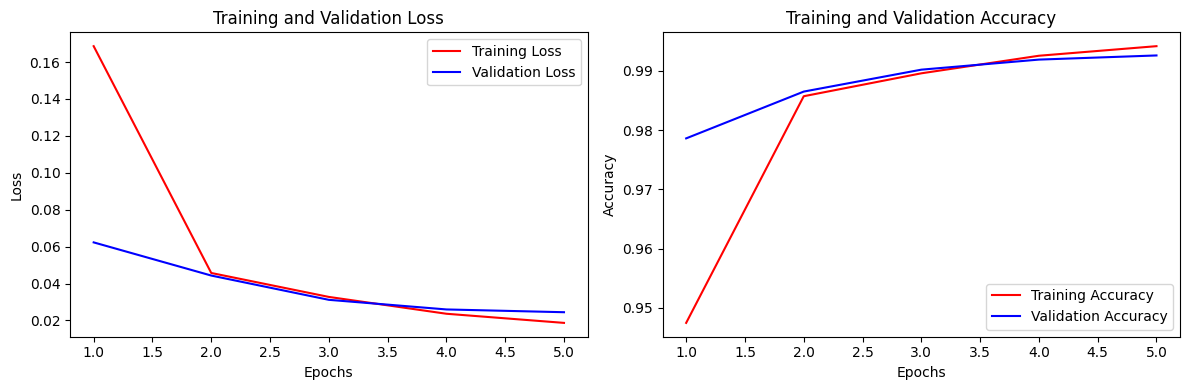

In [ ]:
import matplotlib.pyplot as plt

# Get the training history dictionary
history_dict = history_dict

# Extract training and validation loss and accuracy
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

# Create subplots
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r-', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'r-', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## Part 2 ConvNet for small dataset

Having to train an image classification model using very little data is a common situation, which you’ll likely encounter in practice if you ever do computer vision in a professional context. A “few” samples can mean anywhere from a few hundred to a few tens of thousands of images. As a practical example, we’ll focus on classifying images as dogs or cats, in a dataset containing 4,000 pictures of cats and dogs (2,000 cats, 2,000 dogs). We’ll use 2,000 pictures for training – 1,000 for validation, and 1,000 for testing.

### Dataset
Download the original dataset at [kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) (create a Kaggle account if you don't already have one).

If you use Google Colab and don't want to download the whole dataset on your computer, you can link a Kaggle account with Colab. For further information see link below: https://www.kaggle.com/general/74235

In [ ]:
! pip install -q kaggle
import shutil
import os
# # Use below code to upload your kaggle.json to colab environment (you can download kaggle.json from your Profile->Account->API Token)
# from google.colab import files
# files.upload()

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create ~/.kaggle directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
if not os.path.exists(kaggle_dir):
    os.mkdir(kaggle_dir)

# Copy kaggle.json from your Google Drive to the right location
shutil.copy("/content/drive/MyDrive/Machine Learning/kaggle.json", kaggle_dir)

# Set the right permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dataset
!kaggle competitions download -c dogs-vs-cats -f train.zip

# Unzip the dataset
!unzip train.zip > /dev/null 2>&1

100% 541M/543M [00:04<00:00, 171MB/s]
100% 543M/543M [00:04<00:00, 133MB/s]


This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is ~ 800MB large (compressed). After downloading and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

As we only need 4000 images, you do not need to download the whole dataset. You can download only train set (~500MB large) or copy the first 4000 images from someone else in the group.

After downloading the data, you have to arrange them correctly in the catalogues. Data should be split into separate catalogs for dogs and for cats. You can do it manually or in python (for example using `os` and `shutil` libraries.

In [ ]:
import os
import shutil

# Create directories
main_directory = "data"
subsets = ['train', 'validation', 'test']
classes = ['dog', 'cat']

for subset in subsets:
    for class_name in classes:
        os.makedirs(os.path.join(main_directory, subset, class_name), exist_ok=True)

# Move the images to corresponding directories
src_directory = 'train'

# Training data: 1000 samples of each class
for i in range(1000):
    shutil.move(os.path.join(src_directory, f'cat.{i}.jpg'), os.path.join(main_directory, 'train', 'cat'))
    shutil.move(os.path.join(src_directory, f'dog.{i}.jpg'), os.path.join(main_directory, 'train', 'dog'))

# Validation data: 500 samples of each class
for i in range(1000, 1500):
    shutil.move(os.path.join(src_directory, f'cat.{i}.jpg'), os.path.join(main_directory, 'validation', 'cat'))
    shutil.move(os.path.join(src_directory, f'dog.{i}.jpg'), os.path.join(main_directory, 'validation', 'dog'))

# Test data: 500 samples of each class
for i in range(1500, 2000):
    shutil.move(os.path.join(src_directory, f'cat.{i}.jpg'), os.path.join(main_directory, 'test', 'cat'))
    shutil.move(os.path.join(src_directory, f'dog.{i}.jpg'), os.path.join(main_directory, 'test', 'dog'))


Please check the train/validation/test datasets. We now have 2000 training images, then 1000 validation images and 1000 test images (optional). In each split, there is the same number of samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate measure of success.

### Network architecture

You've already built a small convnet for MNIST in the previous exercise. You will reuse the same general structure: our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150×150 (a somewhat arbitrary choice), we end up with feature maps of size 7×7 right before the Flatten layer. Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148×148 to 7×7). This is a pattern that you will see in almost all convnets. Since we are attacking a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.
Please create your network architecture based on the information above (<ins>4x Conv2d, 4x Maxpooling layers and then Flatten, 2 x Dense layer</ins>).

Model summary should look like this:

In [ ]:
#TODO: Configure the model to look at the following summary
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

# Rescaling layer to scale the input data
model.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))

# 4 Convolutional layers with MaxPooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# 2 Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)      

Compilation step:
- RMSprop optimizer - with learning rate parameter(lr=1e-4)
- Binary crossentropy loss funtion
- Accuracy metric

In [ ]:
#TODO: Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Data preprocessing
Data preprocessing steps include the following:

- Read the picture files.
- Decode the JPEG content to RBG grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. It has a module with image processing helper tools, located at `tensorflow.keras.preprocessing`. In particular, it contains the class ImageDataGenerator (**In older version of tensorflow only. It is now replaced by** `image_dataset_from_directory`) which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here. One of the useful properties of ImageDataGenerator is the ability to automatically label data based on which folder they are in. That is why, at the beginning of the exercise, we put dogs and cats into the appropriate folders.

`Be careful with polish characters when specifying paths to directories.`

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths to the train and validation directories
train_dir = os.path.join(main_directory, 'train')
validation_dir = os.path.join(main_directory, 'validation')

# Define path to the test directory
test_dir = os.path.join(main_directory, 'test')

# For training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="binary",  # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),  # All images will be resized to 150x150
    shuffle=True,
)

# For validation dataset
val_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)

# For test dataset
test_dataset = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150),
    shuffle=True,
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Let's fit our model to the dataset. We may pass a validation_data argument.

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 [==============================] - 124s 1s/step - loss: 0.7219 - accuracy: 0.5250 - val_loss: 0.6917 - val_accuracy: 0.5010
Epoch 2/30
100/100 [==============================] - 117s 1s/step - loss: 0.6915 - accuracy: 0.5570 - val_loss: 0.7354 - val_accuracy: 0.5010
Epoch 3/30
100/100 [==============================] - 117s 1s/step - loss: 0.6586 - accuracy: 0.6290 - val_loss: 0.6413 - val_accuracy: 0.6170
Epoch 4/30
100/100 [==============================] - 110s 1s/step - loss: 0.5943 - accuracy: 0.6845 - val_loss: 0.5941 - val_accuracy: 0.6920
Epoch 5/30
100/100 [==============================] - 115s 1s/step - loss: 0.5485 - accuracy: 0.7205 - val_loss: 0.6116 - val_accuracy: 0.6780
Epoch 6/30
100/100 [==============================] - 120s 1s/step - loss: 0.4993 - accuracy: 0.7615 - val_loss: 0.6013 - val_accuracy: 0.7100
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.4513 - accuracy: 0.7825 - val_loss: 0.6529 - val_accuracy: 0.7190

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

50/50 [==============================] - 14s 270ms/step - loss: 3.4556 - accuracy: 0.6940
Test Loss: 3.4556
Test Accuracy: 0.6940


### Outcome analysis

Plot the loss and accuracy of the model over the training and validation data during training.

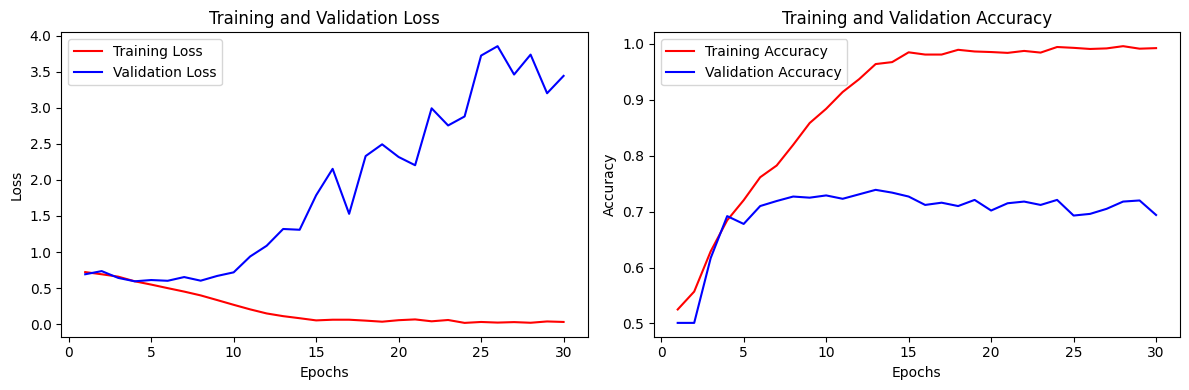

In [ ]:
# Extract values from the training history
history_dict = history.history
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

# Setup the subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, 'r-', label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'r-', label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In these plots, you should see that the model is overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. There are many techniques that can help mitigate overfitting, such as reducing the number of epochs, adding dropout layers dropout, or weight decay (L2 regularization). We will look at them next weeks.